# Seaborn
Inteligencia Artificial - Facundo A. Lucianna - CEIA - FIUBA

Seaborn es una libreria de visualización de datos basada en matplotlib. Introduce una interfaz de alto nivel para realizar graficos atractivos. Se integra muy bien con Pandas

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos un dataset de ejemplo que nos da Seaborn:

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Gráficos de distribución

Por un lado, tenemos los gráficos de distribución (**sns.distplot()**) el cual nos permite gráficar histogramas o similares. Como Seaborn se integra con Pandas, con solo pasarle que DataFrame es, que columna usar para la distribución y que columna usar para colorear nos arma el gráfico.

Además el manejo de clases como la columna **species** lo hace sin necesidad de transformala en número o variable categorica:


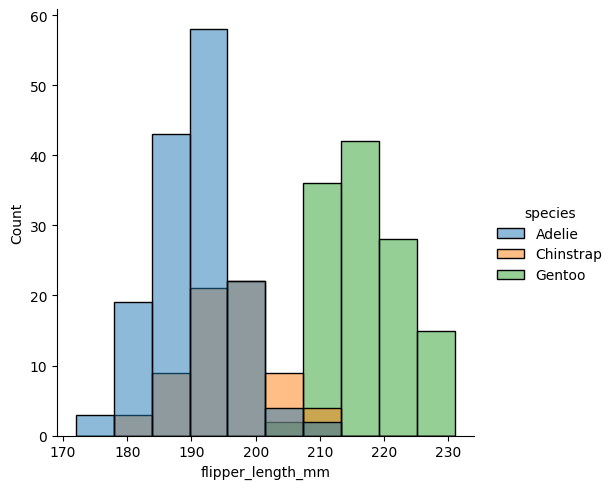

In [4]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species");

Si le indicamos explicitamente, la misma función no grafica un grafico de estimación de densidad:

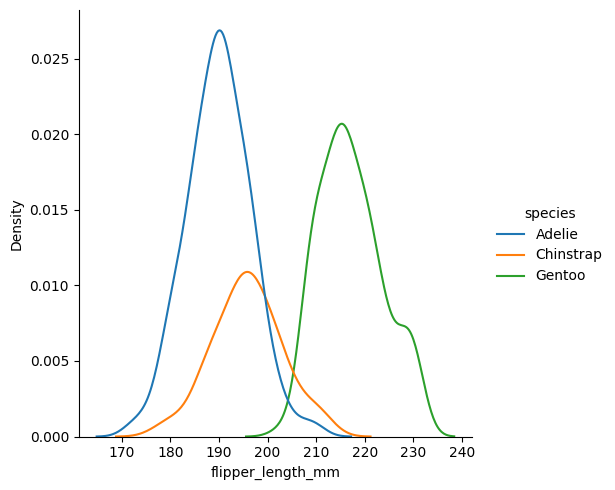

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde");

Además puedo separar los graficos en filas o columnas usando el argumento **col** o **row**

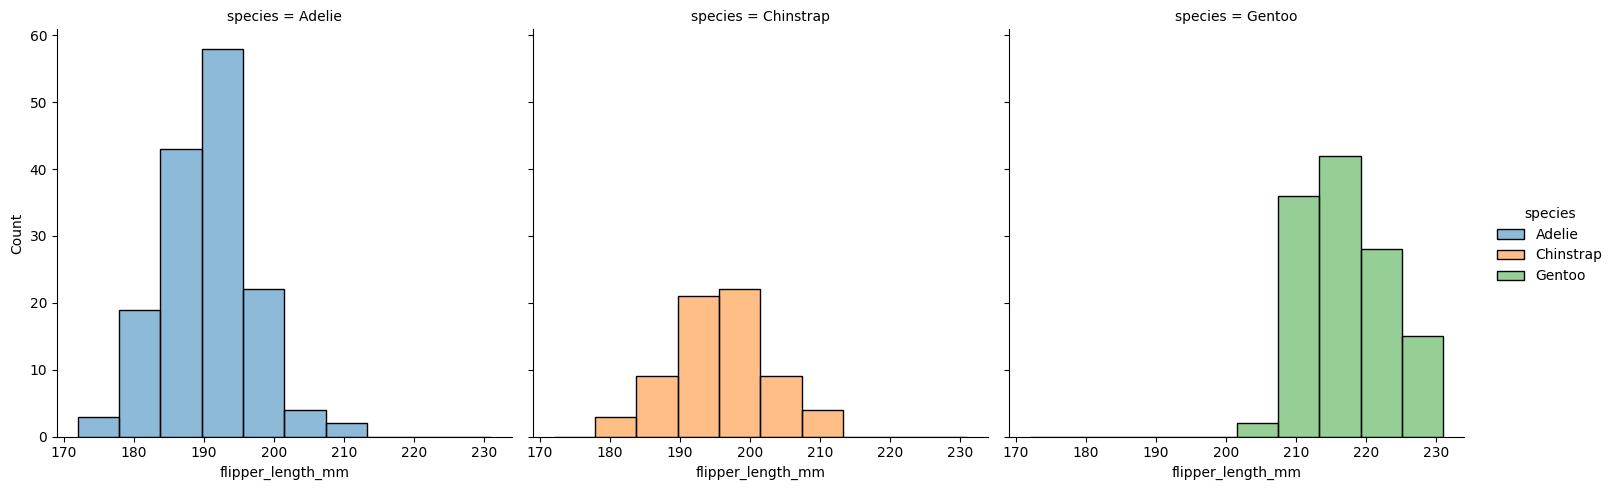

In [6]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species");

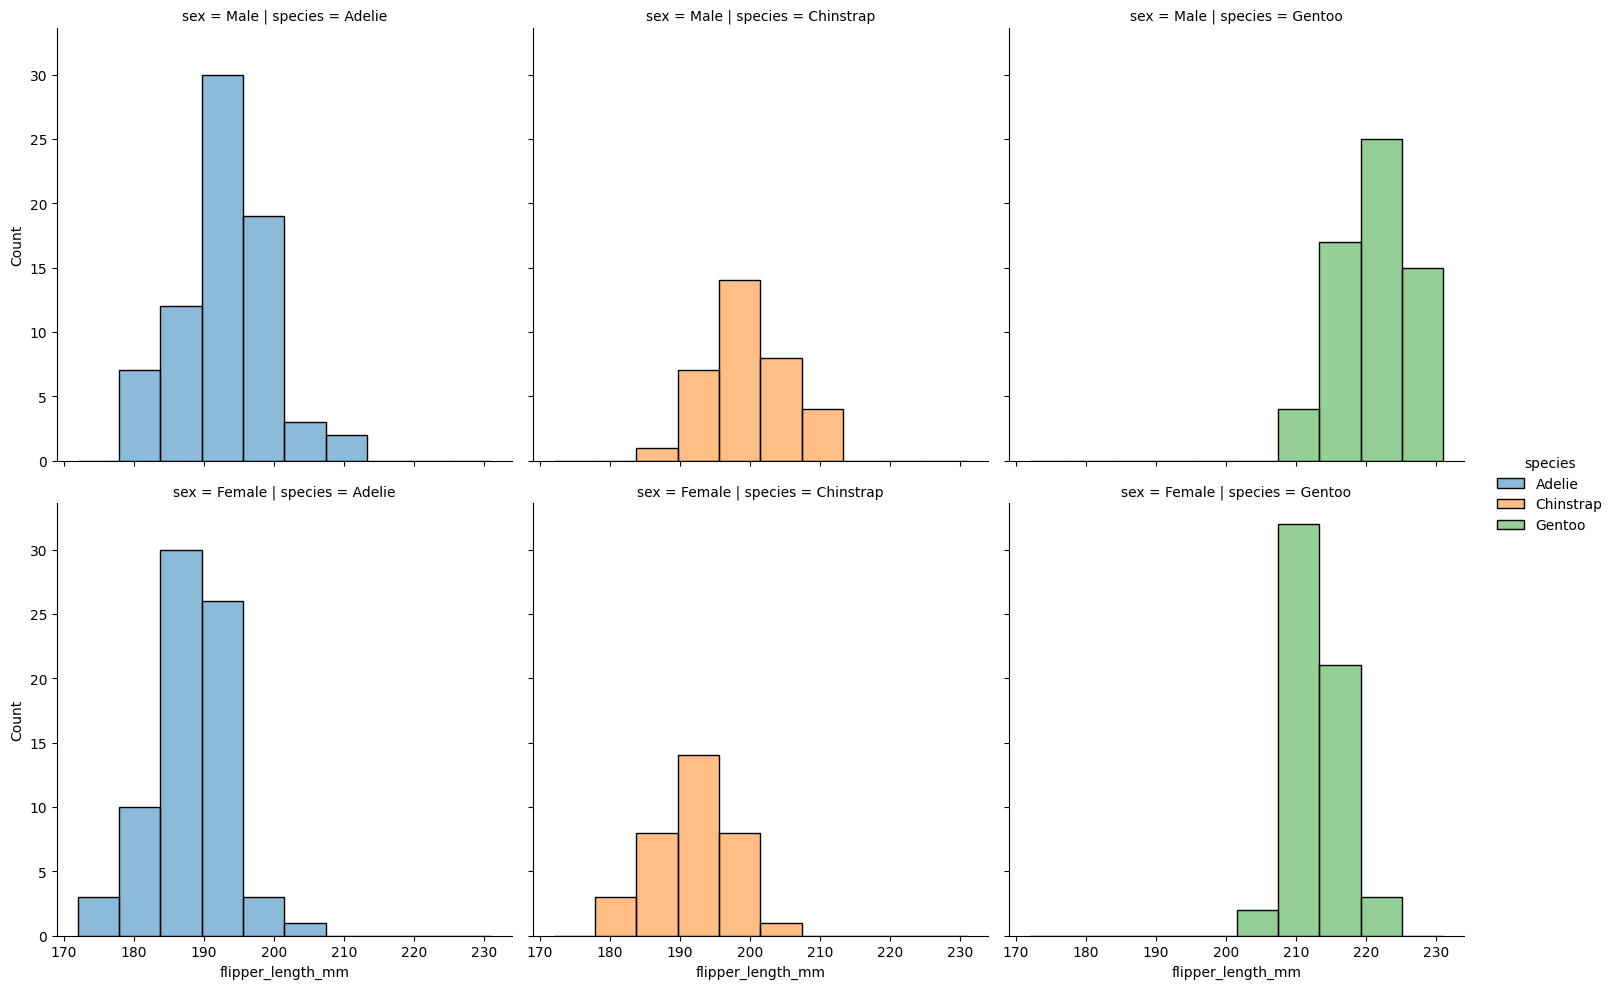

In [7]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species", row="sex");

Seaborn se encarga de los textos, títulos, etc. se vean "bonitos".

## Gráficos de relación

Por otro lado, Seaborn nos ofrece gráficos de relación para estudiar relaciones entre variables. Para ver esto, cargamos el dataset tips que viene en Seaborn con datos de propinas:

In [8]:
tips = sns.load_dataset("tips")

Con la función `sns.relplot()` nos arma un gráfico de dispersión por defecto, el cual podemos usar a las columnas del DataFrame para codificar diferentes elementos del gráfico: 

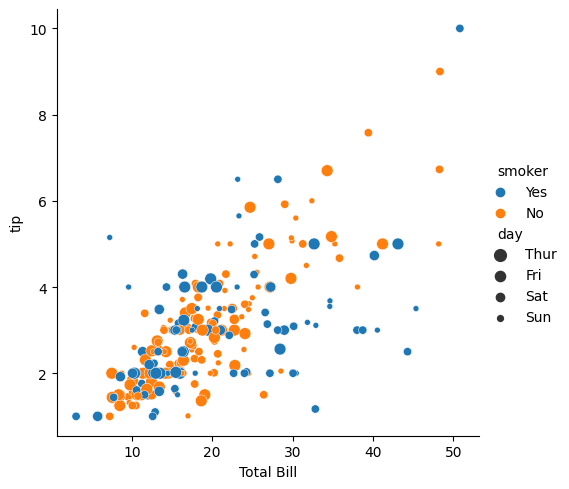

In [9]:
g = sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", size="day")
g.ax.set_xlabel("Total Bill");

Si especificamos el tipo ``kind="line"`, el grafico es de linea:

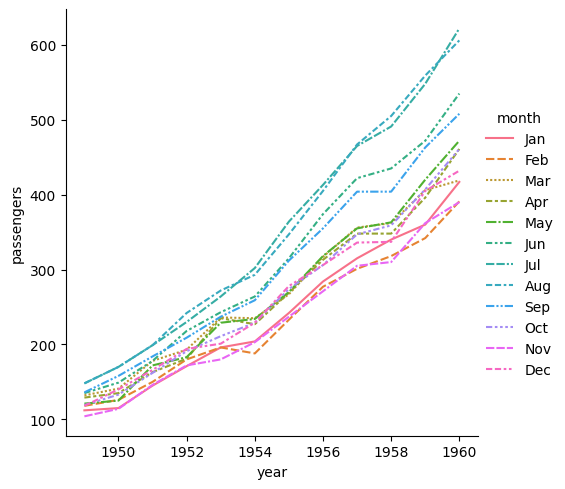

In [10]:
flights = sns.load_dataset("flights")
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line", style="month");

Cambiando que usamos para columna o para color, podemos obtener destacar diferente información:

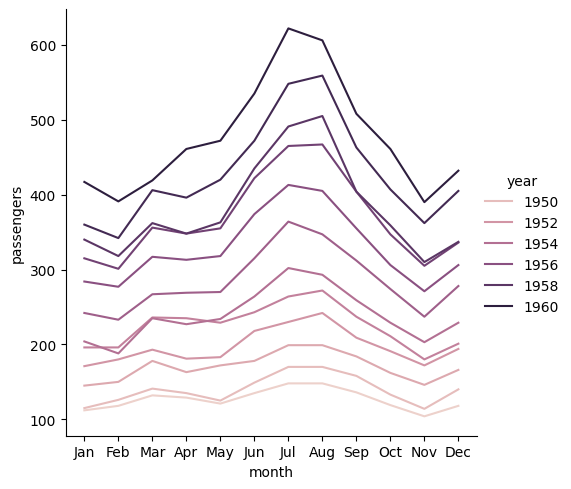

In [11]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line");

# Multiples tipos de gráficos

Si queremos realizar múltiples tipos de gráficos podemos usar el objeto `sns.FacetGrid()`. El cual podemos definir la cantidad de filas y columnas usando  columnas en el DataFrame en específico.

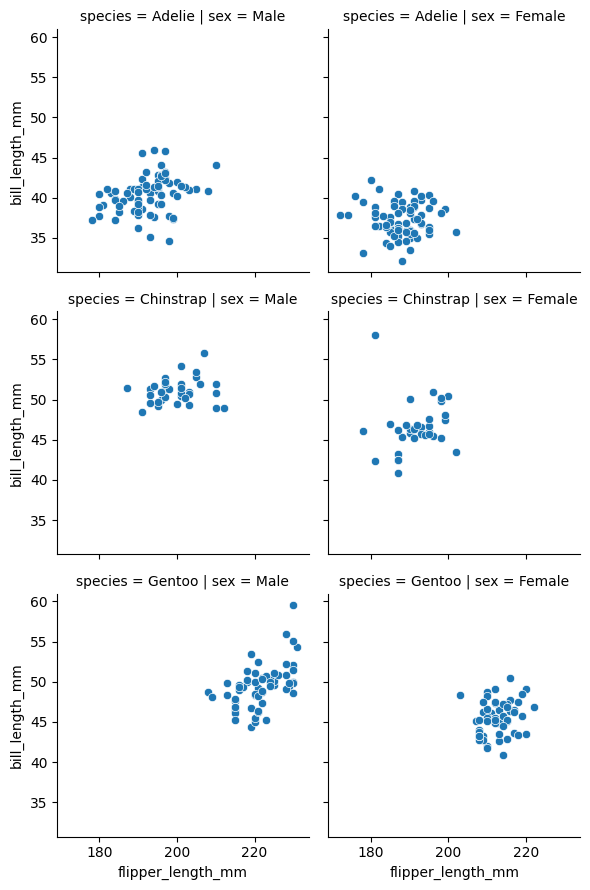

In [12]:
g = sns.FacetGrid(data=penguins, col="sex", row="species")
g.map(sns.scatterplot, "flipper_length_mm", "bill_length_mm");

## Gráficos complejos

Seaborn nos permite gráficar en un mismo grafico la distribución de las columnas y como se distribuyen entre si en un espacio bidimensional usando `sns.jointplot()`

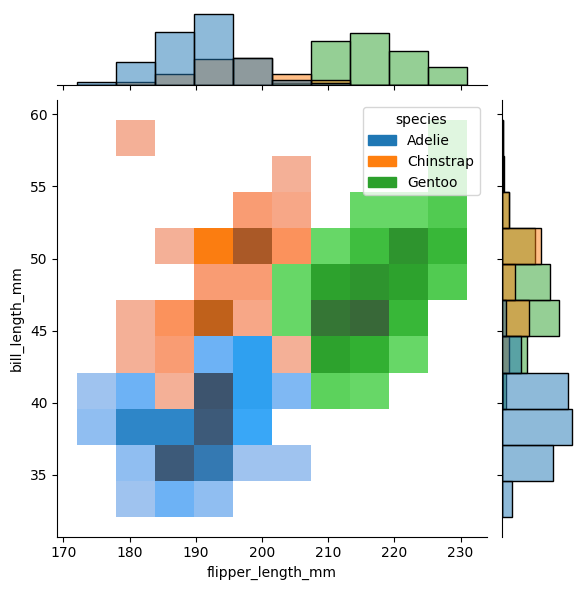

In [13]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist");

Con `sns.pairplot()` podemos graficar a todas las columnas numericas del DataFrame de a pares mostrando gráficos de dispersión (o cualquier otro gráfico de dispersión) y en la primera diagonal nos presenta la distribución de una sola variable:

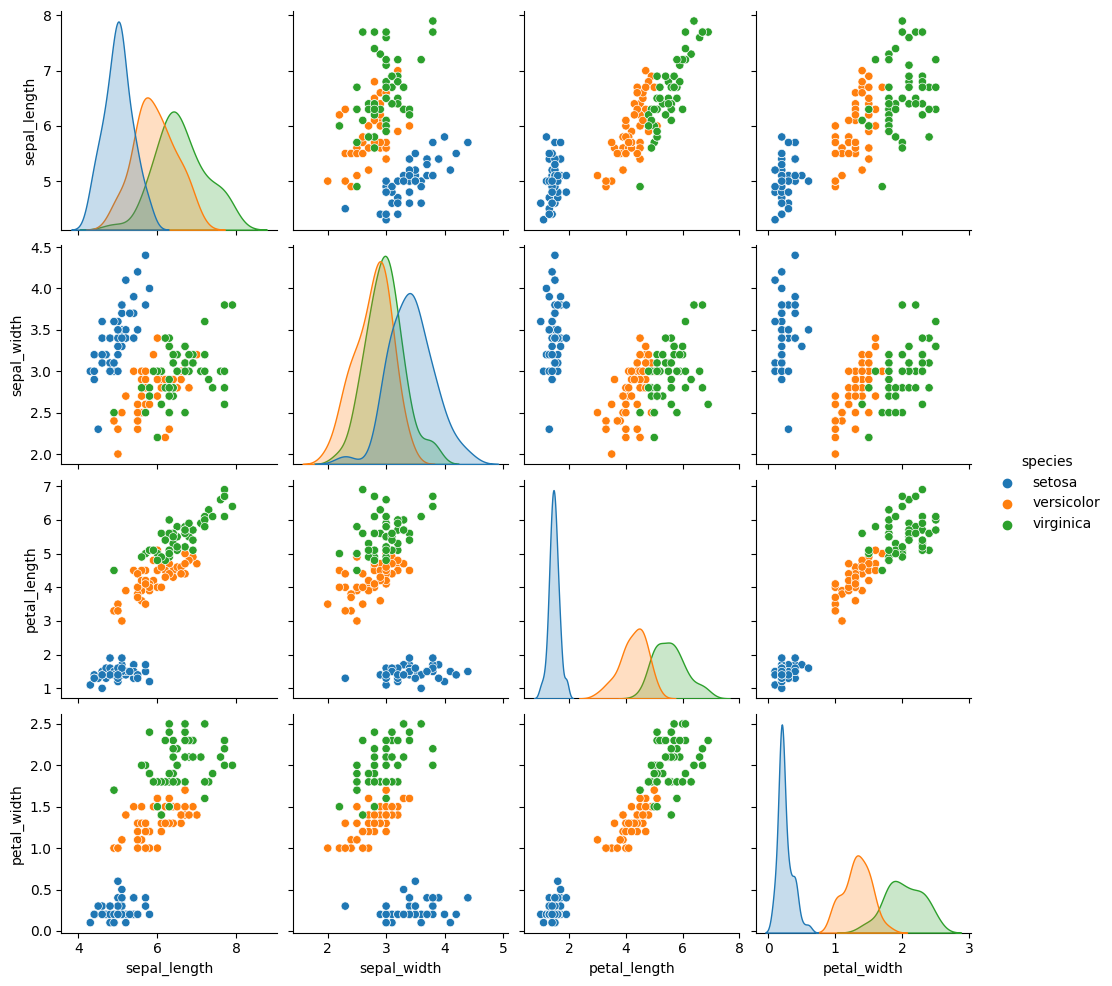

In [14]:
iris = sns.load_dataset("iris")

sns.pairplot(data=iris, hue="species");

## Temas

Uno de los focos principales de Seaborn es el estilo de gráfico. 

Por un lado podemos definir el estilo, donde podemos cambiar como se ven los gráficos:

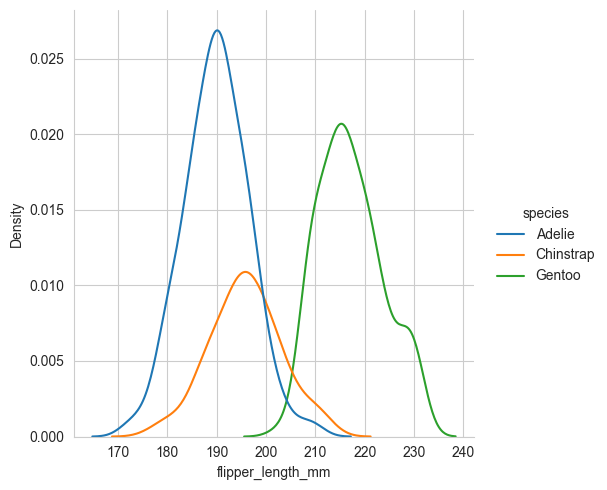

In [15]:
sns.set_style("whitegrid")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde");

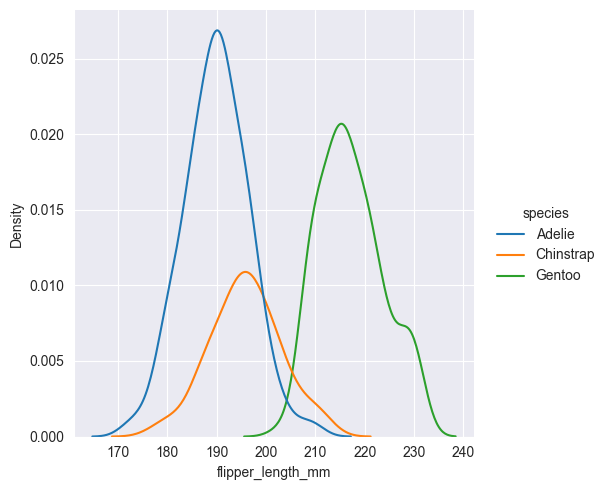

In [16]:
sns.set_style("darkgrid")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde");

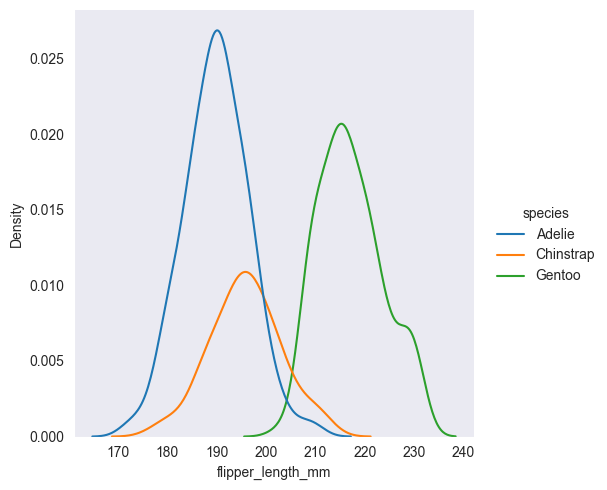

In [17]:
sns.set_style("dark")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde");

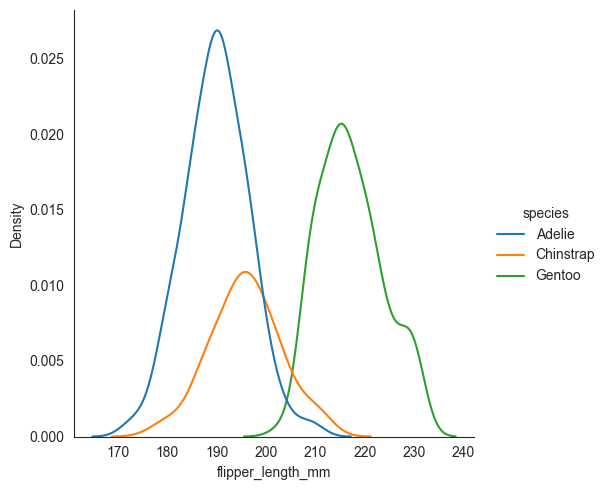

In [18]:
sns.set_style("white")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde");

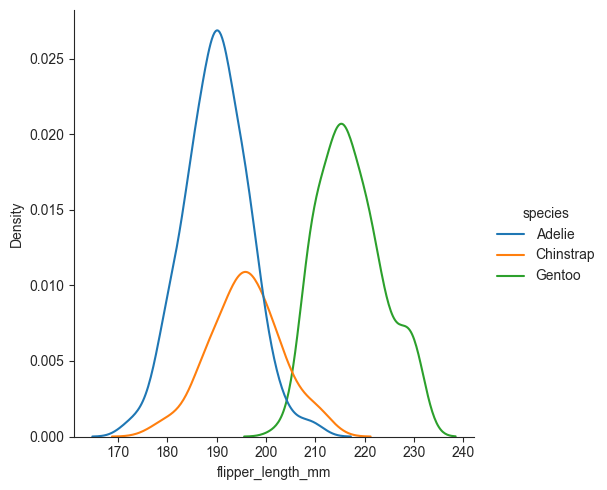

In [19]:
sns.set_style("ticks")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde");

Por otro lado tenemos también podemos cambiar el contexto, el cual ajusta el tamaño del texto y grosores para usarse en diferente media

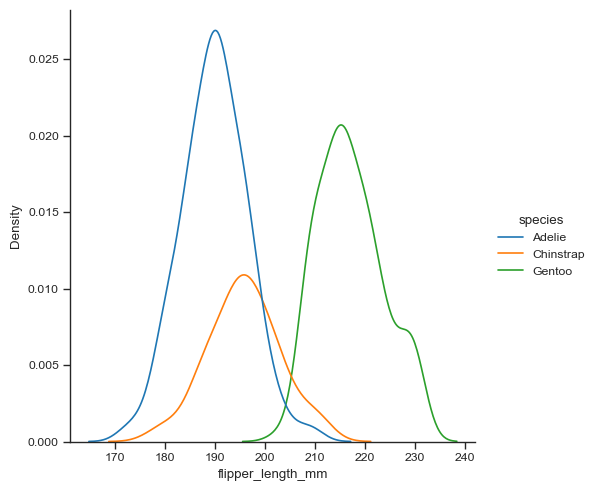

In [20]:
sns.set_context("paper")
g = sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

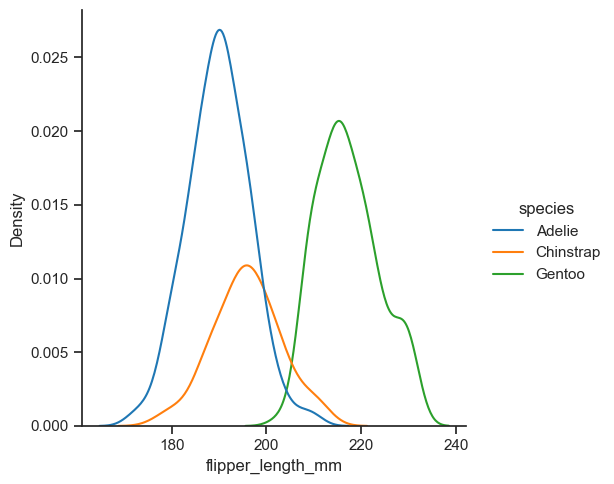

In [21]:
sns.set_context("notebook")
g = sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

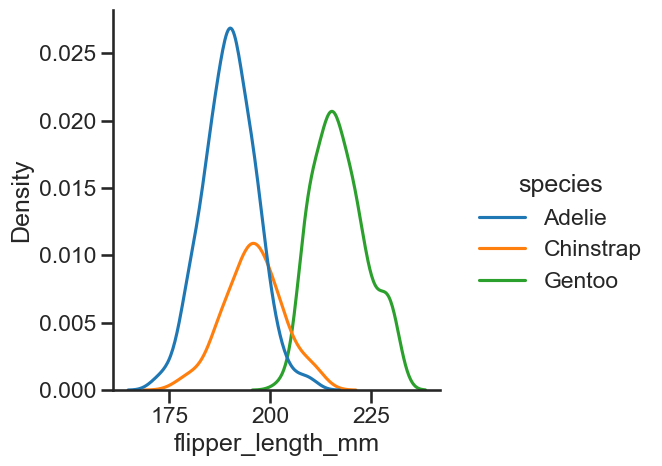

In [22]:
sns.set_context("talk")
g = sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

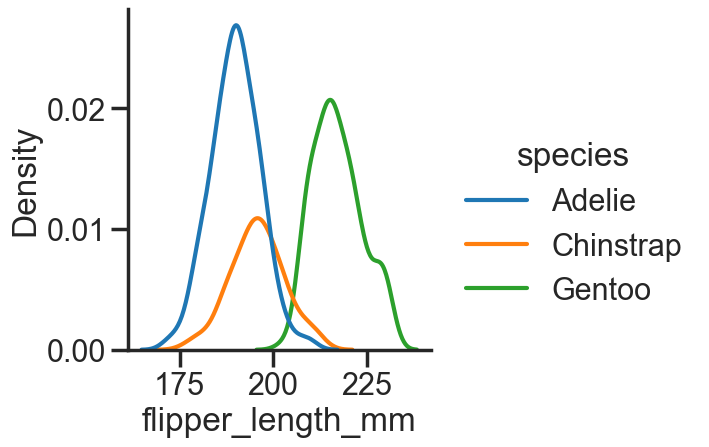

In [23]:
sns.set_context("poster")
g = sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

Y por último, podemos definir un tema el cual nos permite definir el contexto, el estilo y que paleta de colores usar:

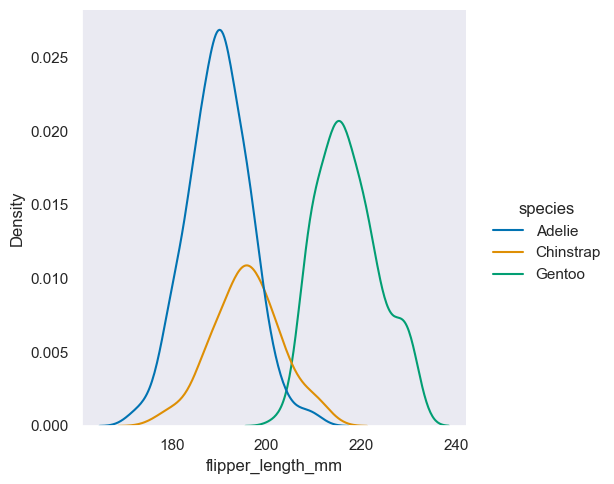

In [24]:
sns.set_theme(context="notebook", style="dark", palette="colorblind")
g = sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")